In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('/content/drive/MyDrive/test_turbo_with_rul.csv')
train = pd.read_csv('/content/drive/MyDrive/train_turbo_with_rul.csv')

In [4]:
train.shape

(53759, 29)

In [5]:
test.shape

(33991, 30)

In [6]:
train.columns

Index(['index', 'engine_no', 'cycles_completed', 'altitude', 'mach_no',
       'throttle_angle', 'fan_inlet_temp', 'lpc_outlet_temp',
       'hpc_outlet_temp', 'lpt_outlet_temp', 'fan_inlet_pressure',
       'bypass_duct_pressure', 'hpc_outlet_pressure', 'fan_speed',
       'core_speed', 'engine_pressure_ratio', 'hpc_outlet_static_pressure',
       'fuel_ps30_ratio', 'corrected_fan_speed', 'corrected_core_speed',
       'bypass_ratio', 'burner_fuel_air_ratio', 'bleed_enthalpy',
       'demanded_fan_speed', 'demanded_corrected_fan_speed',
       'hpt_coolant_bleed', 'lpt_coolant_bleed', 'source', 'RUL'],
      dtype='object')

In [7]:
test.columns

Index(['index_x', 'engine_no', 'cycles_completed', 'altitude', 'mach_no',
       'throttle_angle', 'fan_inlet_temp', 'lpc_outlet_temp',
       'hpc_outlet_temp', 'lpt_outlet_temp', 'fan_inlet_pressure',
       'bypass_duct_pressure', 'hpc_outlet_pressure', 'fan_speed',
       'core_speed', 'engine_pressure_ratio', 'hpc_outlet_static_pressure',
       'fuel_ps30_ratio', 'corrected_fan_speed', 'corrected_core_speed',
       'bypass_ratio', 'burner_fuel_air_ratio', 'bleed_enthalpy',
       'demanded_fan_speed', 'demanded_corrected_fan_speed',
       'hpt_coolant_bleed', 'lpt_coolant_bleed', 'source', 'index_y',
       'remaining_useful_life'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         53759 non-null  int64  
 1   engine_no                     53759 non-null  int64  
 2   cycles_completed              53759 non-null  int64  
 3   altitude                      53759 non-null  float64
 4   mach_no                       53759 non-null  float64
 5   throttle_angle                53759 non-null  float64
 6   fan_inlet_temp                53759 non-null  float64
 7   lpc_outlet_temp               53759 non-null  float64
 8   hpc_outlet_temp               53759 non-null  float64
 9   lpt_outlet_temp               53759 non-null  float64
 10  fan_inlet_pressure            53759 non-null  float64
 11  bypass_duct_pressure          53759 non-null  float64
 12  hpc_outlet_pressure           53759 non-null  float64
 13  f

In [3]:
train = train.drop(['index', 'source'], axis=1)

In [4]:
train.columns

Index(['engine_no', 'cycles_completed', 'altitude', 'mach_no',
       'throttle_angle', 'fan_inlet_temp', 'lpc_outlet_temp',
       'hpc_outlet_temp', 'lpt_outlet_temp', 'fan_inlet_pressure',
       'bypass_duct_pressure', 'hpc_outlet_pressure', 'fan_speed',
       'core_speed', 'engine_pressure_ratio', 'hpc_outlet_static_pressure',
       'fuel_ps30_ratio', 'corrected_fan_speed', 'corrected_core_speed',
       'bypass_ratio', 'burner_fuel_air_ratio', 'bleed_enthalpy',
       'demanded_fan_speed', 'demanded_corrected_fan_speed',
       'hpt_coolant_bleed', 'lpt_coolant_bleed', 'RUL'],
      dtype='object')

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_no,53759.0,131.082981,74.463862,1.0000,68.0000,131.0000,195.0000,260.0000
cycles_completed,53759.0,109.154746,69.180569,1.0000,52.0000,104.0000,157.0000,378.0000
altitude,53759.0,23.998407,14.747376,0.0000,10.0046,25.0013,41.9980,42.0080
mach_no,53759.0,0.572056,0.310016,0.0000,0.2507,0.7000,0.8400,0.8420
throttle_angle,53759.0,94.046020,14.237735,60.0000,100.0000,100.0000,100.0000,100.0000
fan_inlet_temp,53759.0,472.910207,26.389707,445.0000,445.0000,462.5400,491.1900,518.6700
lpc_outlet_temp,53759.0,579.672399,37.289399,535.5300,549.5700,555.9800,607.3400,644.5200
hpc_outlet_temp,53759.0,1419.971013,105.946341,1243.7300,1352.7600,1369.1800,1499.3700,1612.8800
lpt_outlet_temp,53759.0,1205.442024,119.123428,1023.7700,1123.6550,1138.8900,1306.8500,1439.2300
fan_inlet_pressure,53759.0,8.031986,3.613839,3.9100,3.9100,7.0500,10.5200,14.6200


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
index_x,33991.0,70755.000000,9812.500837,53760.0000,62257.50000,70755.0000,79252.5000,87750.0000
engine_no,33991.0,127.528346,74.144727,1.0000,65.00000,128.0000,189.0000,259.0000
cycles_completed,33991.0,81.223647,58.892845,1.0000,34.00000,70.0000,119.0000,367.0000
altitude,33991.0,23.975176,14.778958,0.0000,10.00460,25.0013,35.0080,42.0080
mach_no,33991.0,0.571154,0.310998,0.0000,0.25060,0.7000,0.8400,0.8420
throttle_angle,33991.0,94.066665,14.217415,60.0000,100.00000,100.0000,100.0000,100.0000
fan_inlet_temp,33991.0,472.930049,26.454686,445.0000,449.44000,462.5400,491.1900,518.6700
lpc_outlet_temp,33991.0,579.591704,37.338929,535.4100,549.48000,555.8300,607.2600,644.3200
hpc_outlet_temp,33991.0,1418.562090,105.979169,1245.1600,1351.64000,1367.3700,1498.3000,1609.6900
lpt_outlet_temp,33991.0,1203.086538,119.039415,1030.0900,1122.52000,1134.1600,1305.4550,1434.1200


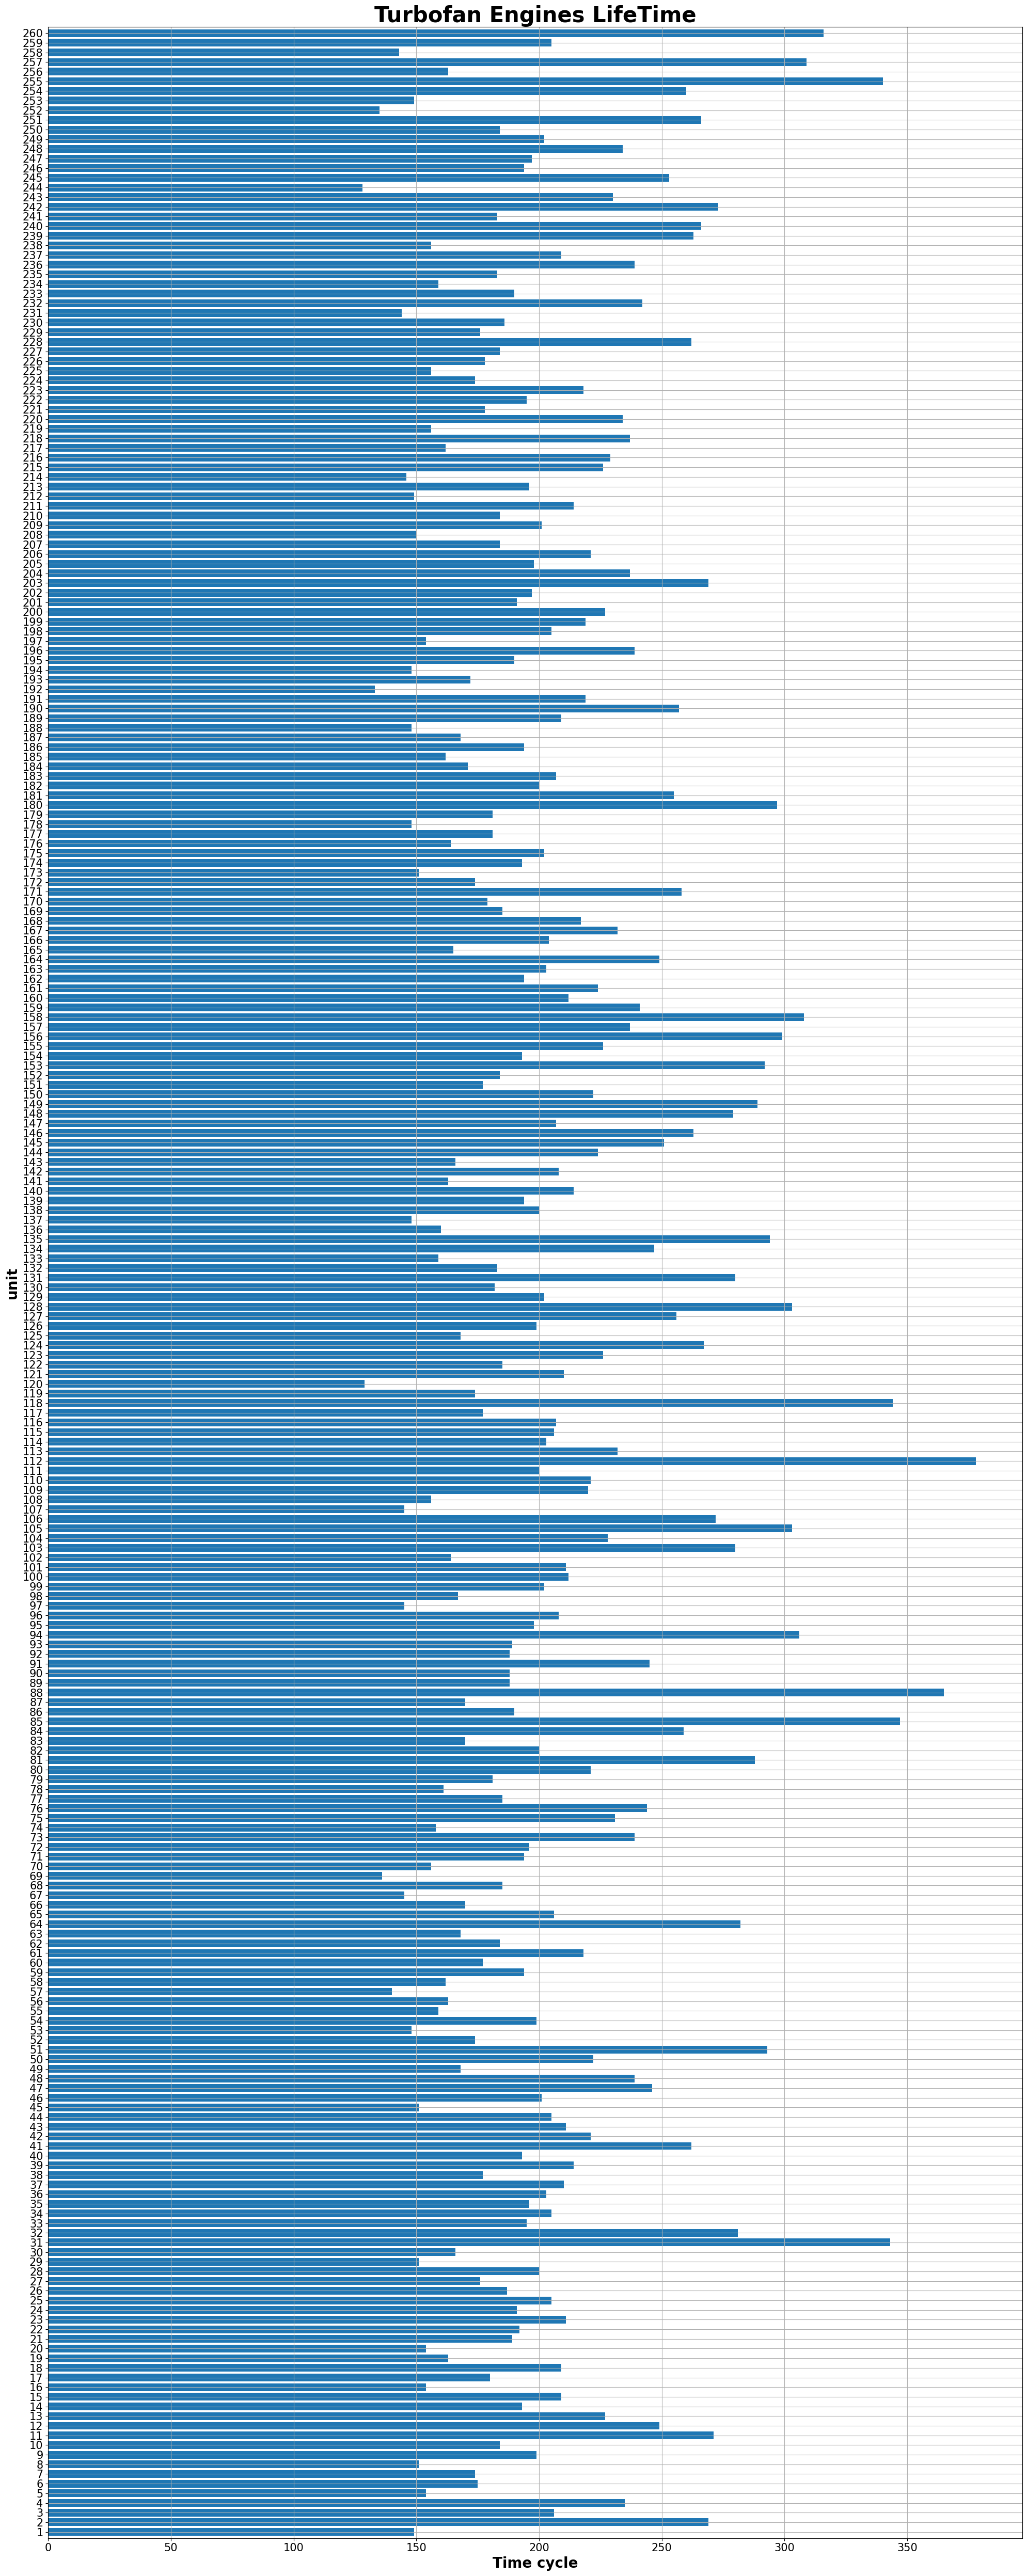

In [13]:
max_time_cycles=train[['engine_no', 'cycles_completed']].groupby('engine_no').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['cycles_completed'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

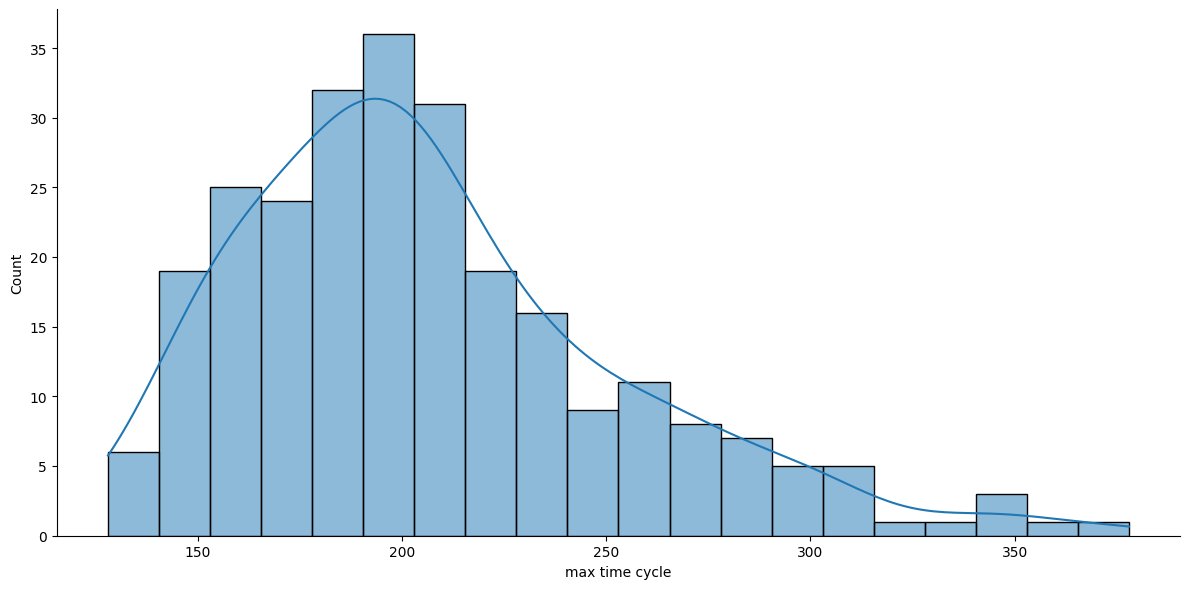

In [14]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['cycles_completed'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [15]:
# sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')
# fig=plt.gcf()
# fig.set_size_inches(20,20)
# plt.show()

matrix = train.corr()
print(matrix)

                              engine_no  cycles_completed  altitude   mach_no  \
engine_no                      1.000000          0.014608 -0.003084 -0.005160   
cycles_completed               0.014608          1.000000  0.000039  0.000750   
altitude                      -0.003084          0.000039  1.000000  0.943005   
mach_no                       -0.005160          0.000750  0.943005  1.000000   
throttle_angle                 0.004777         -0.005057 -0.028488 -0.065350   
fan_inlet_temp                 0.001659         -0.001011 -0.964414 -0.884061   
lpc_outlet_temp                0.003531          0.003753 -0.867452 -0.808822   
hpc_outlet_temp                0.006220          0.024635 -0.787862 -0.759658   
lpt_outlet_temp                0.007947          0.037108 -0.840737 -0.836673   
fan_inlet_pressure             0.002592         -0.000516 -0.987344 -0.932606   
bypass_duct_pressure           0.003033         -0.000691 -0.976459 -0.928264   
hpc_outlet_pressure         

<Axes: >

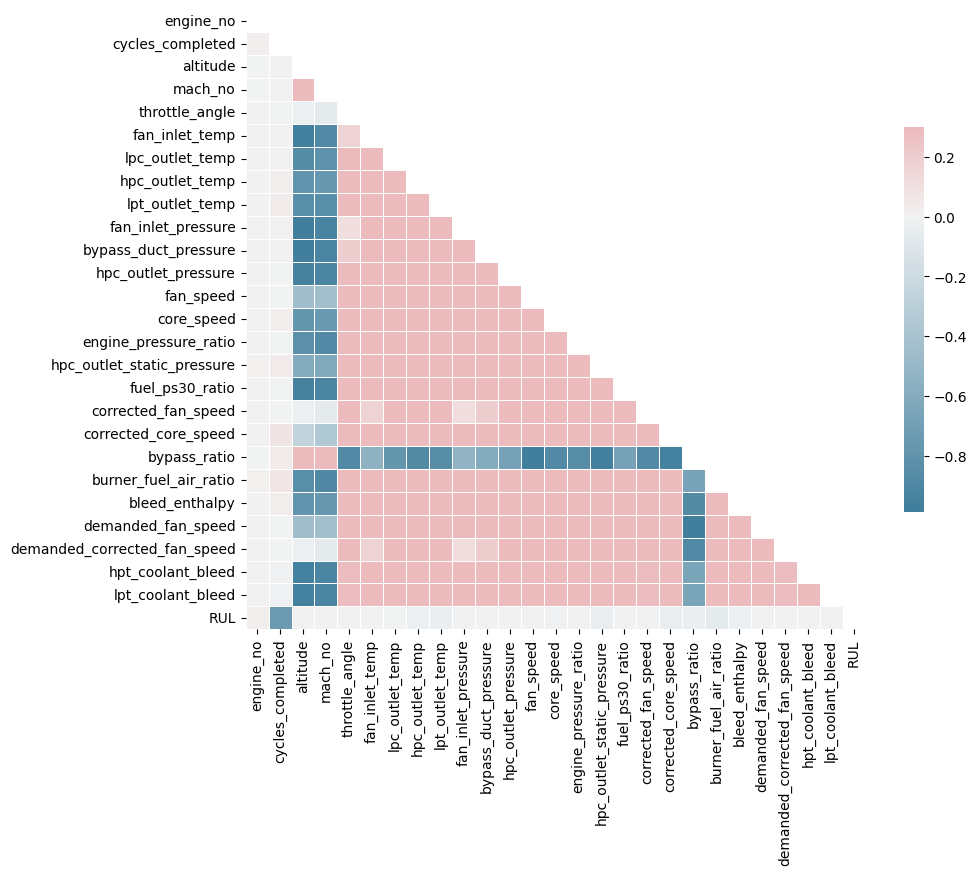

In [16]:
# Compute the correlation matrix
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
train.columns

Index(['engine_no', 'cycles_completed', 'altitude', 'mach_no',
       'throttle_angle', 'fan_inlet_temp', 'lpc_outlet_temp',
       'hpc_outlet_temp', 'lpt_outlet_temp', 'fan_inlet_pressure',
       'bypass_duct_pressure', 'hpc_outlet_pressure', 'fan_speed',
       'core_speed', 'engine_pressure_ratio', 'hpc_outlet_static_pressure',
       'fuel_ps30_ratio', 'corrected_fan_speed', 'corrected_core_speed',
       'bypass_ratio', 'burner_fuel_air_ratio', 'bleed_enthalpy',
       'demanded_fan_speed', 'demanded_corrected_fan_speed',
       'hpt_coolant_bleed', 'lpt_coolant_bleed', 'RUL'],
      dtype='object')

In [18]:
# Your column names
column_names = ['engine_no', 'cycles_completed', 'altitude', 'mach_no',
                'throttle_angle', 'fan_inlet_temp', 'lpc_outlet_temp',
                'hpc_outlet_temp', 'lpt_outlet_temp', 'fan_inlet_pressure',
                'bypass_duct_pressure', 'hpc_outlet_pressure', 'fan_speed',
                'core_speed', 'engine_pressure_ratio', 'hpc_outlet_static_pressure',
                'fuel_ps30_ratio', 'corrected_fan_speed', 'corrected_core_speed',
                'bypass_ratio', 'burner_fuel_air_ratio', 'bleed_enthalpy',
                'demanded_fan_speed', 'demanded_corrected_fan_speed',
                'hpt_coolant_bleed', 'lpt_coolant_bleed', 'RUL']

# Define the Sensor dictionary with the column names
Sensor_dictionary = {
    'fan_inlet_temp': "(Fan inlet temperature) (◦R)",
    'lpc_outlet_temp': "(LPC outlet temperature) (◦R)",
    'hpc_outlet_temp': "(HPC outlet temperature) (◦R)",
    'lpt_outlet_temp': "(LPT outlet temperature) (◦R)",
    'fan_inlet_pressure': "(Fan inlet Pressure) (psia)",
    'bypass_duct_pressure': "(bypass-duct pressure) (psia)",
    'hpc_outlet_pressure': "(HPC outlet pressure) (psia)",
    'fan_speed': "(Physical fan speed) (rpm)",
    'core_speed': "(Physical core speed) (rpm)",
    'engine_pressure_ratio': "(Engine pressure ratio(P50/P2))",
    'hpc_outlet_static_pressure': "(HPC outlet Static pressure) (psia)",
    'fuel_ps30_ratio': "(Ratio of fuel flow to Ps30) (pps/psia)",
    'corrected_fan_speed': "(Corrected fan speed) (rpm)",
    'corrected_core_speed': "(Corrected core speed) (rpm)",
    'bypass_ratio': "(Bypass Ratio)",
    'burner_fuel_air_ratio': "(Burner fuel-air ratio)",
    'bleed_enthalpy': "(Bleed Enthalpy)",
    'demanded_fan_speed': "(Required fan speed)",
    'demanded_corrected_fan_speed': "(Required fan conversion speed)",
    'hpt_coolant_bleed': "(High-pressure turbines Cool air flow)",
    'lpt_coolant_bleed': "(Low-pressure turbines Cool air flow)"
}

def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13, 5))
    for i in df['engine_no'].unique():
        if (i % 10 == 0):  # For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['engine_no'] == i].rolling(10).mean())

    plt.xlim(250, 0)  # Reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

# Assuming your data is in a DataFrame named train
for signal in Sensor_dictionary.keys():
    try:
        plot_signal(train, Sensor_dictionary, signal)
    except Exception as e:
        print(f"Could not plot signal {signal}: {e}")

Output hidden; open in https://colab.research.google.com to view.

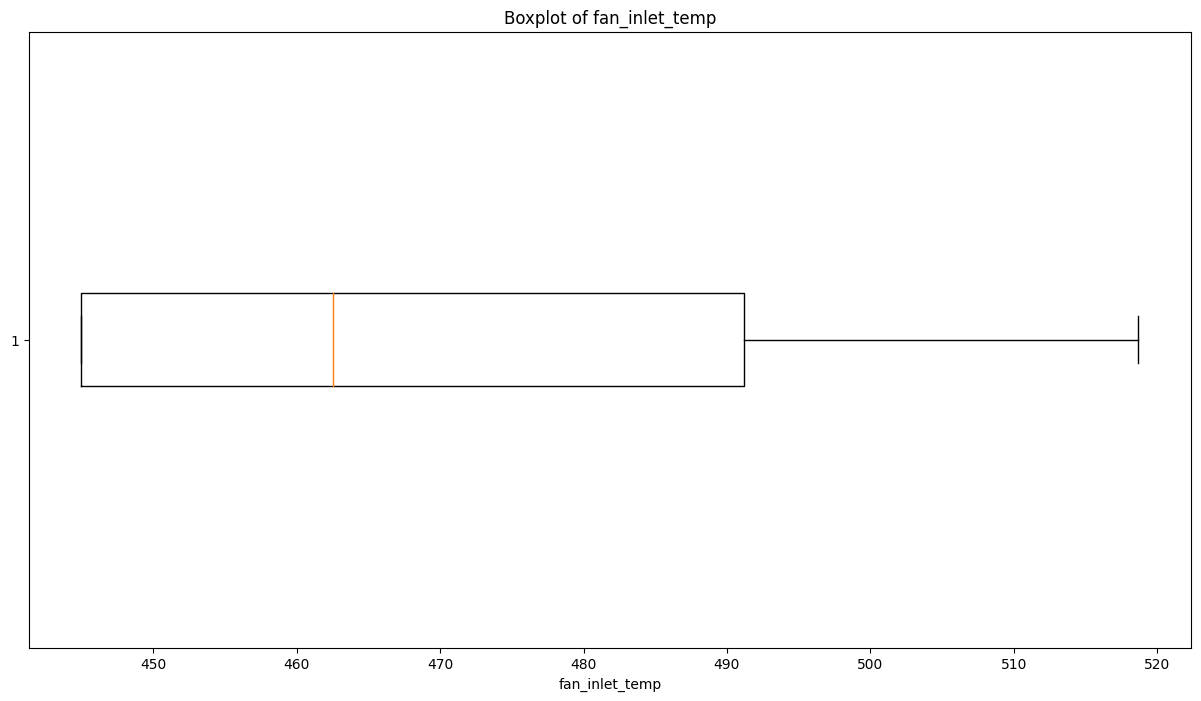

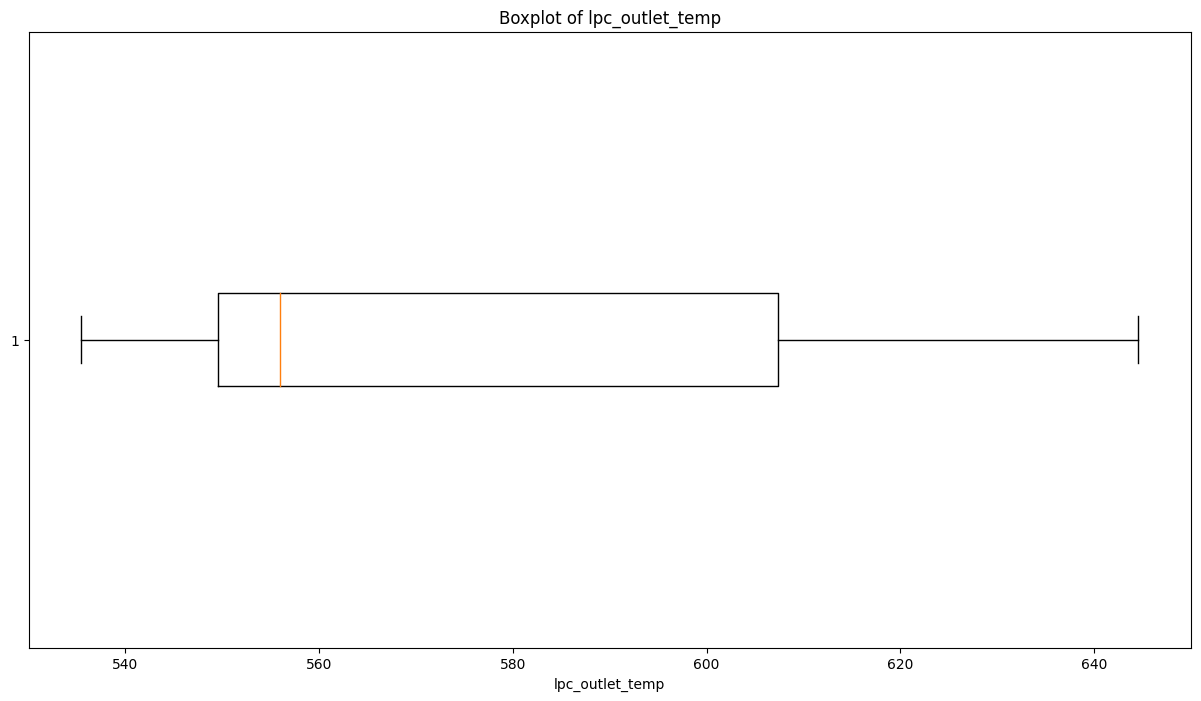

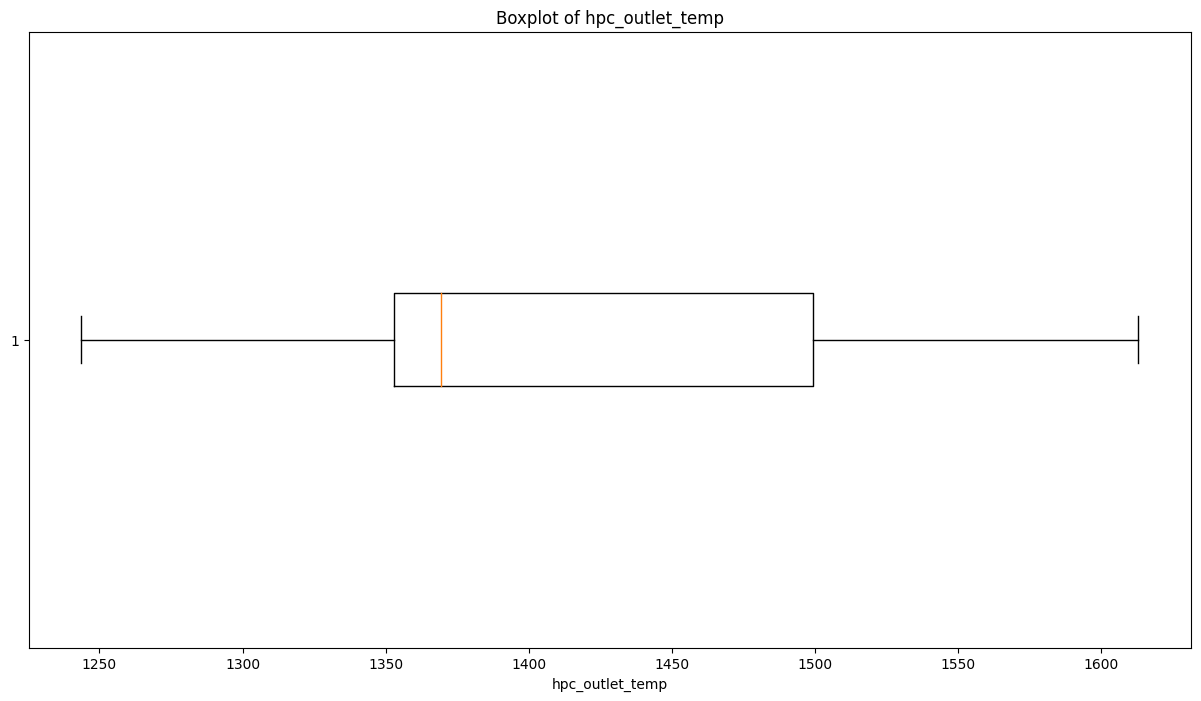

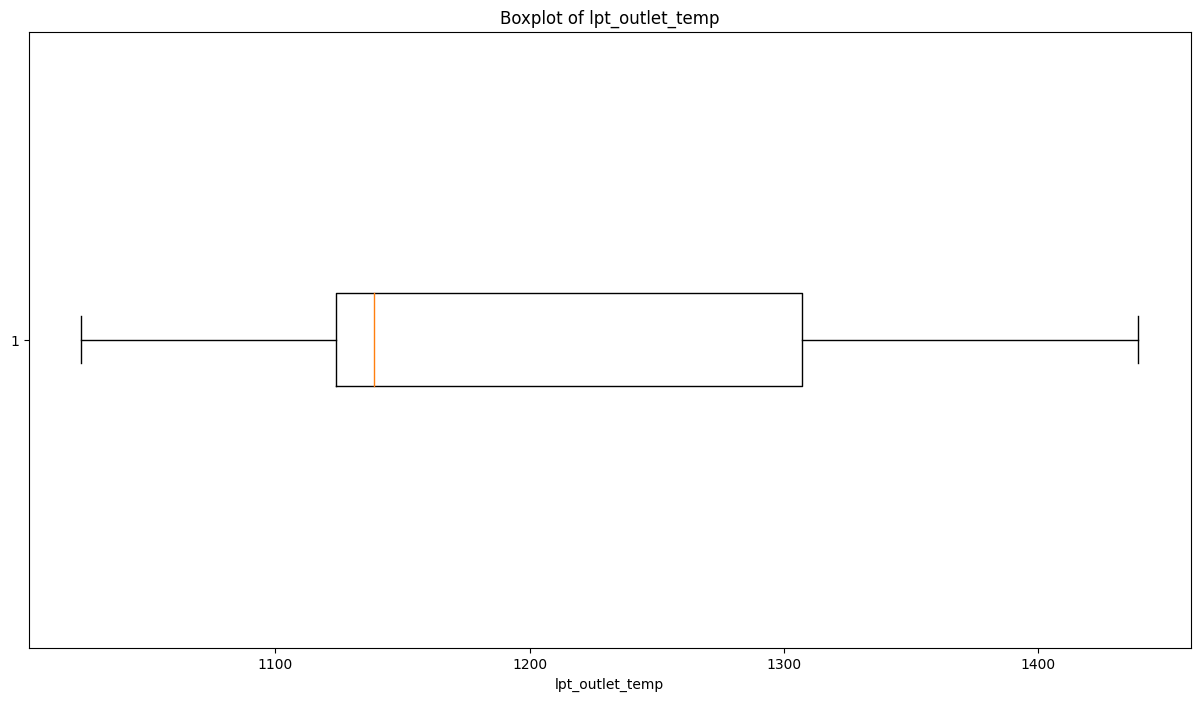

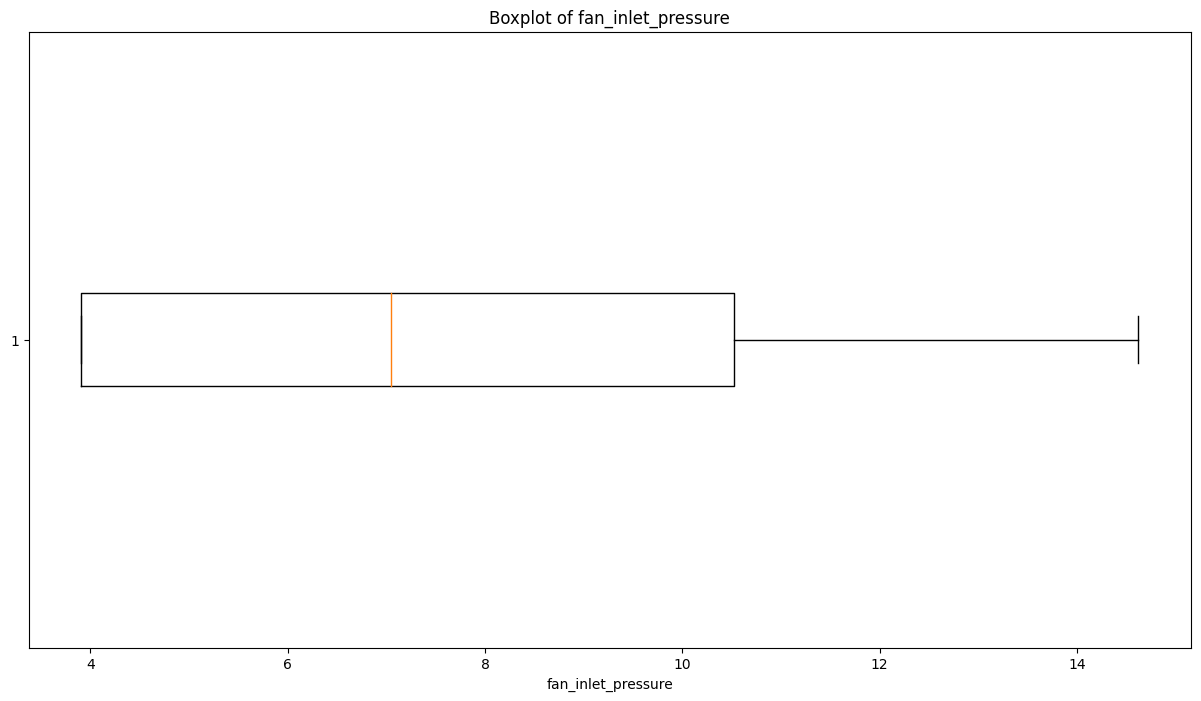

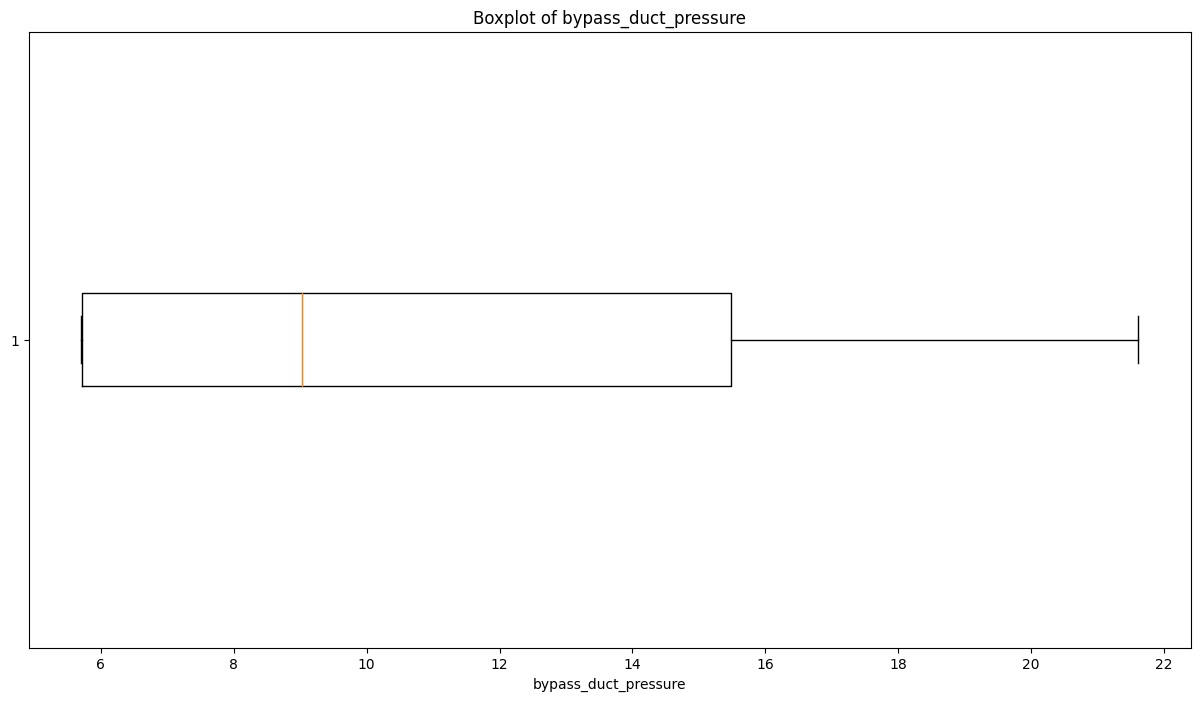

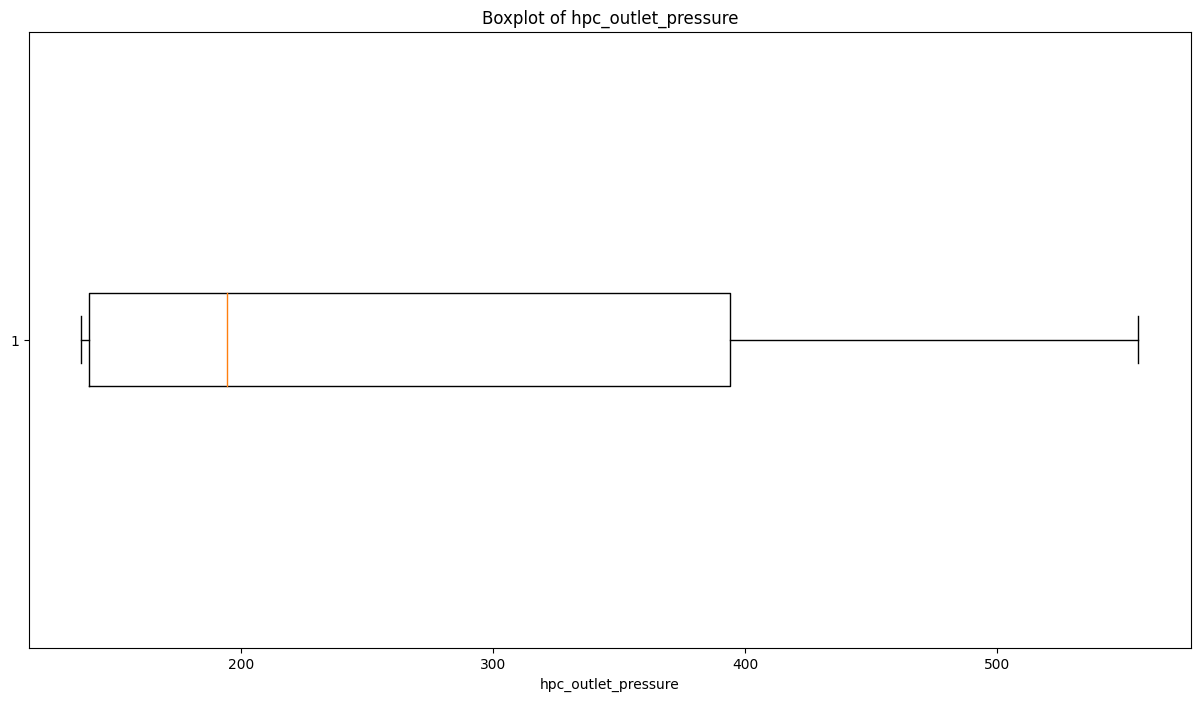

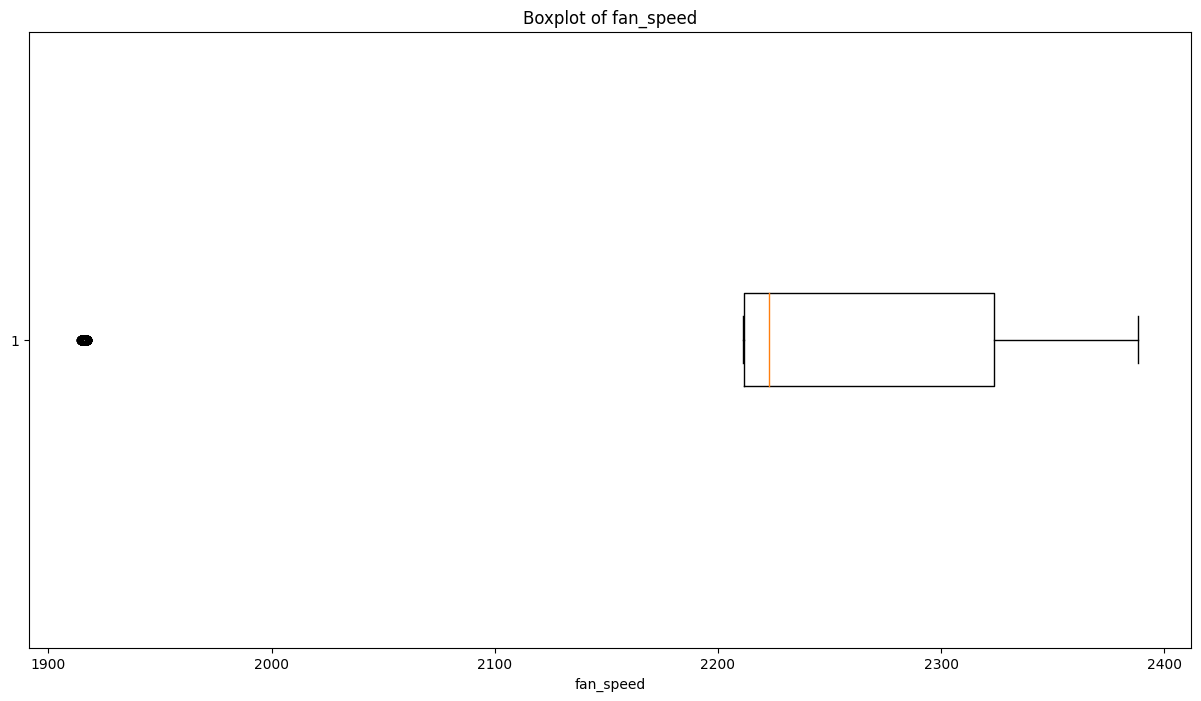

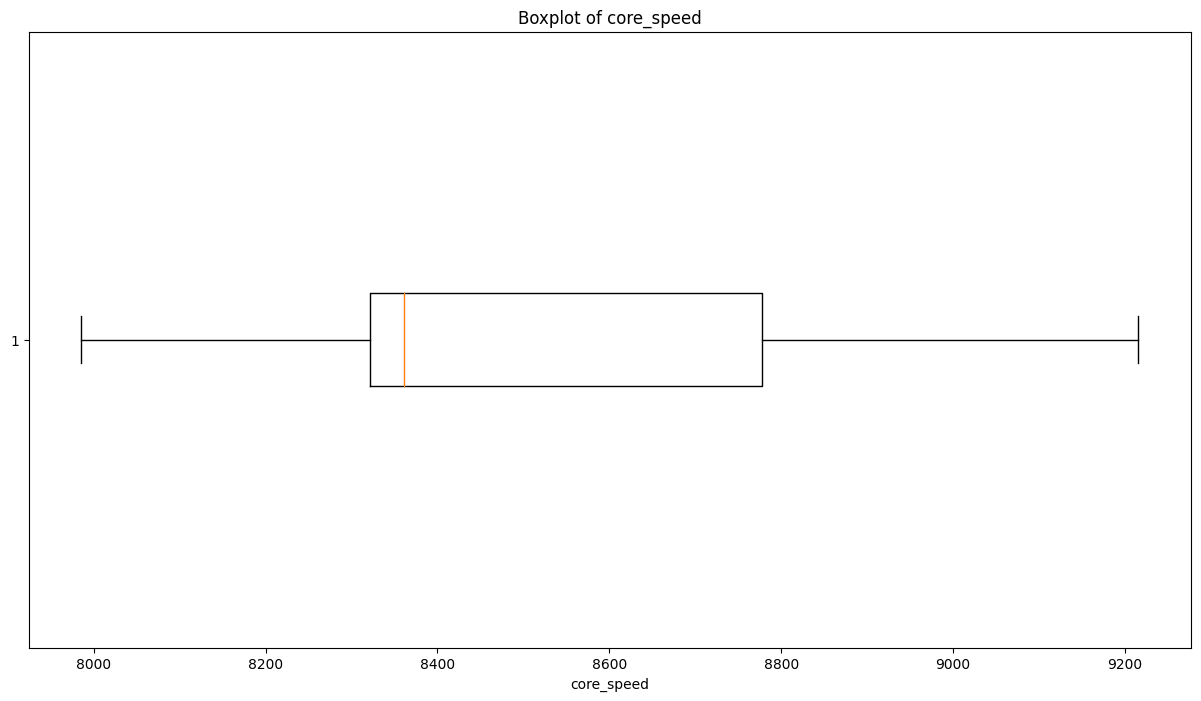

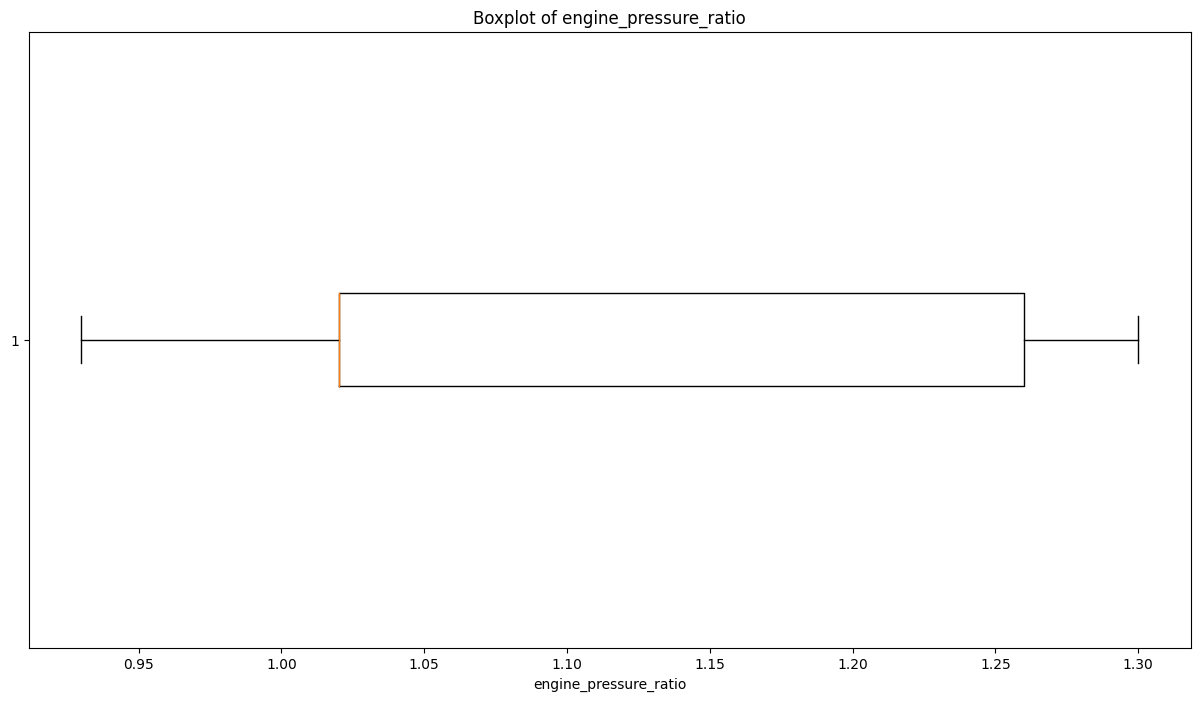

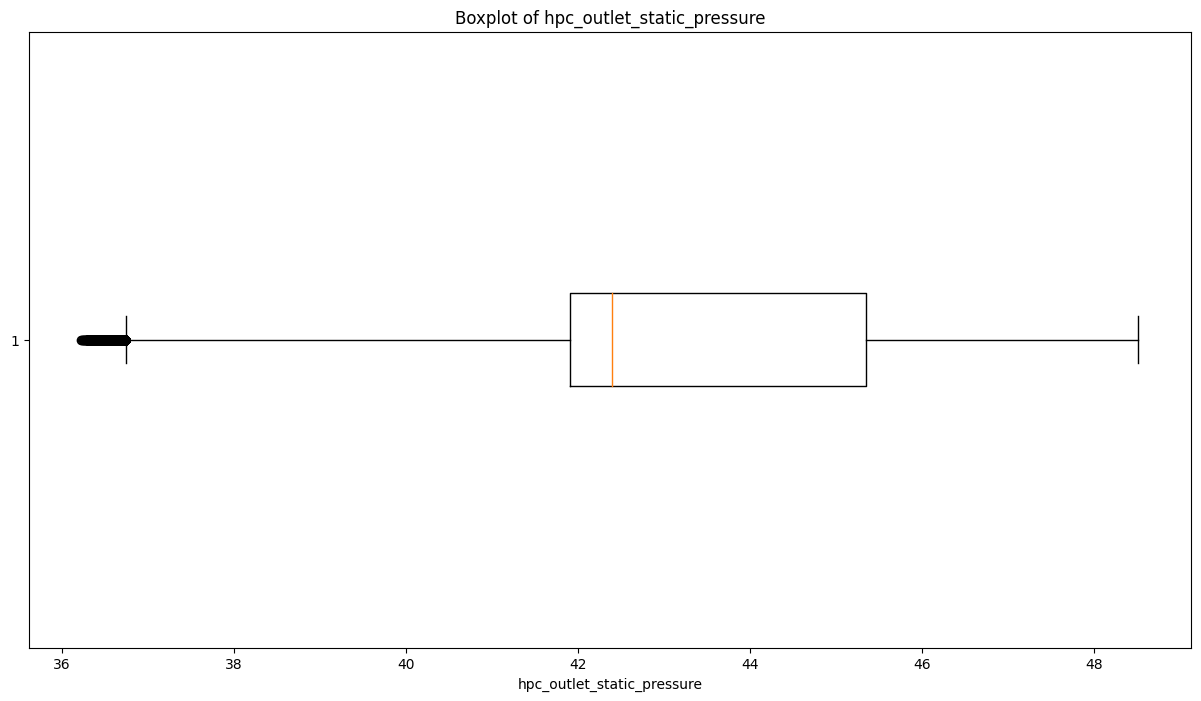

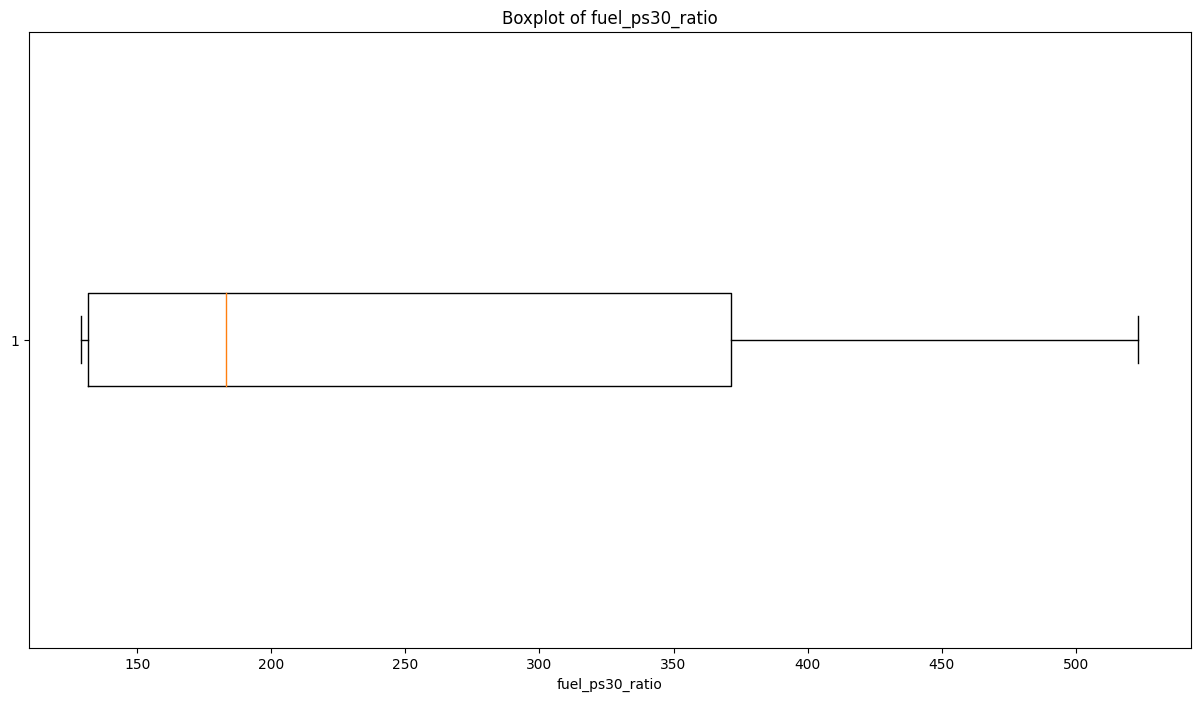

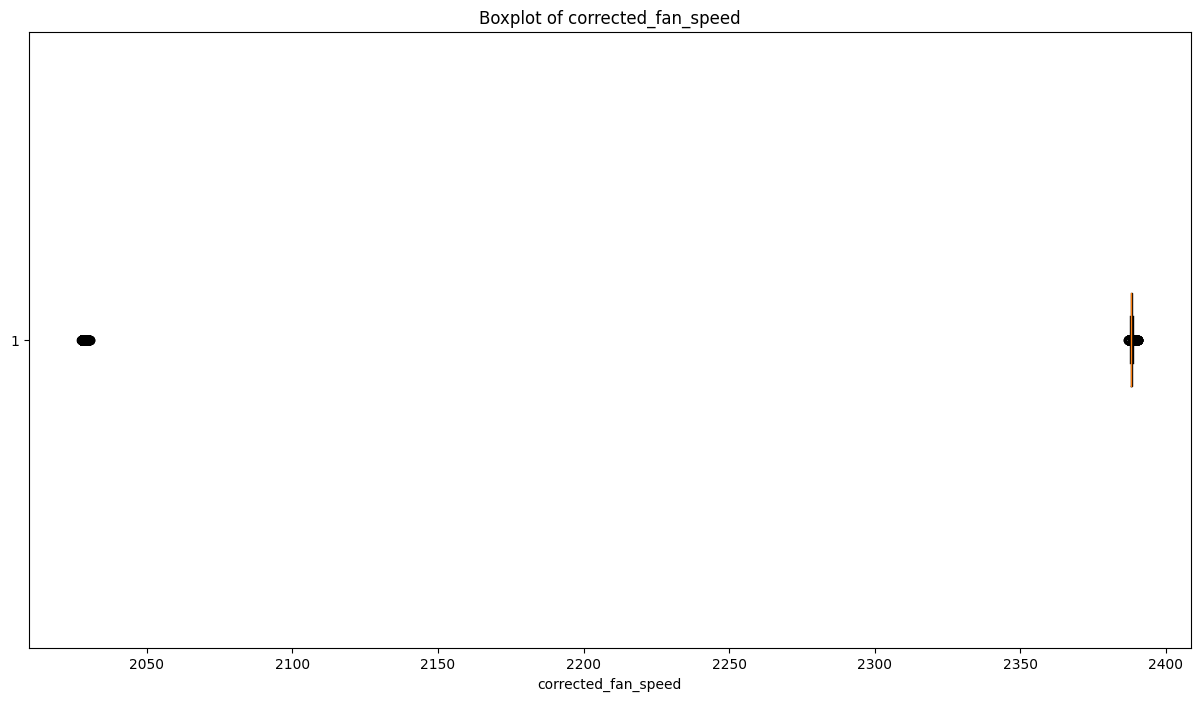

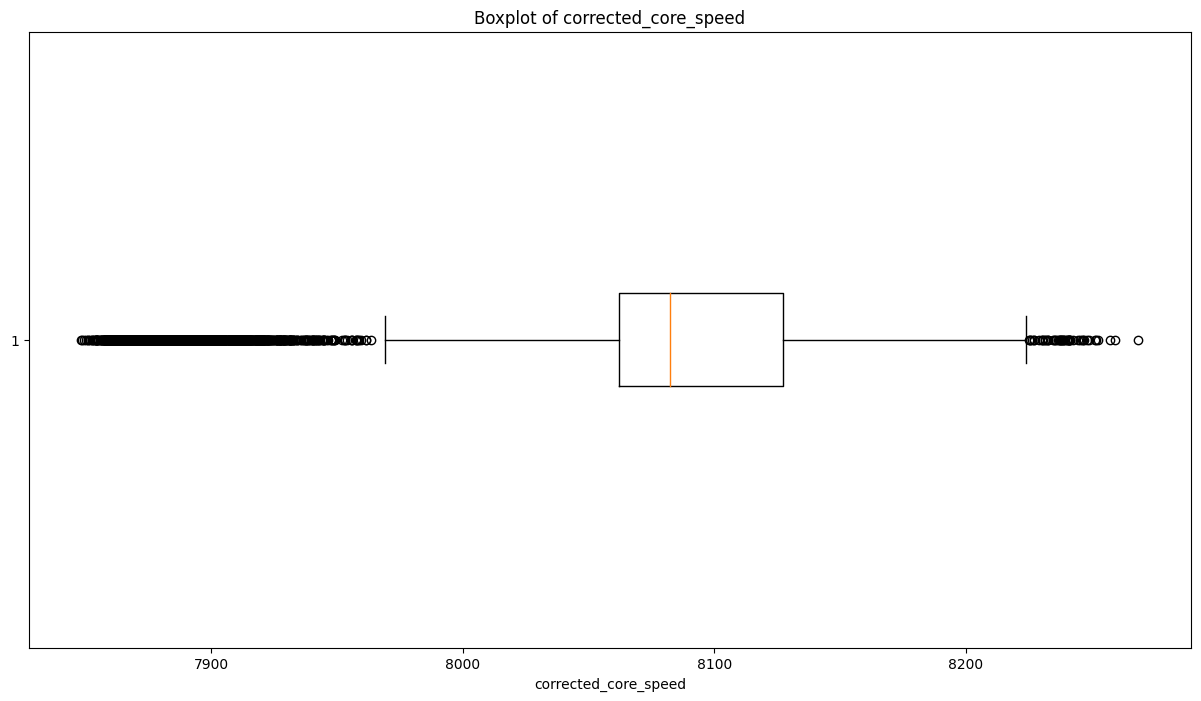

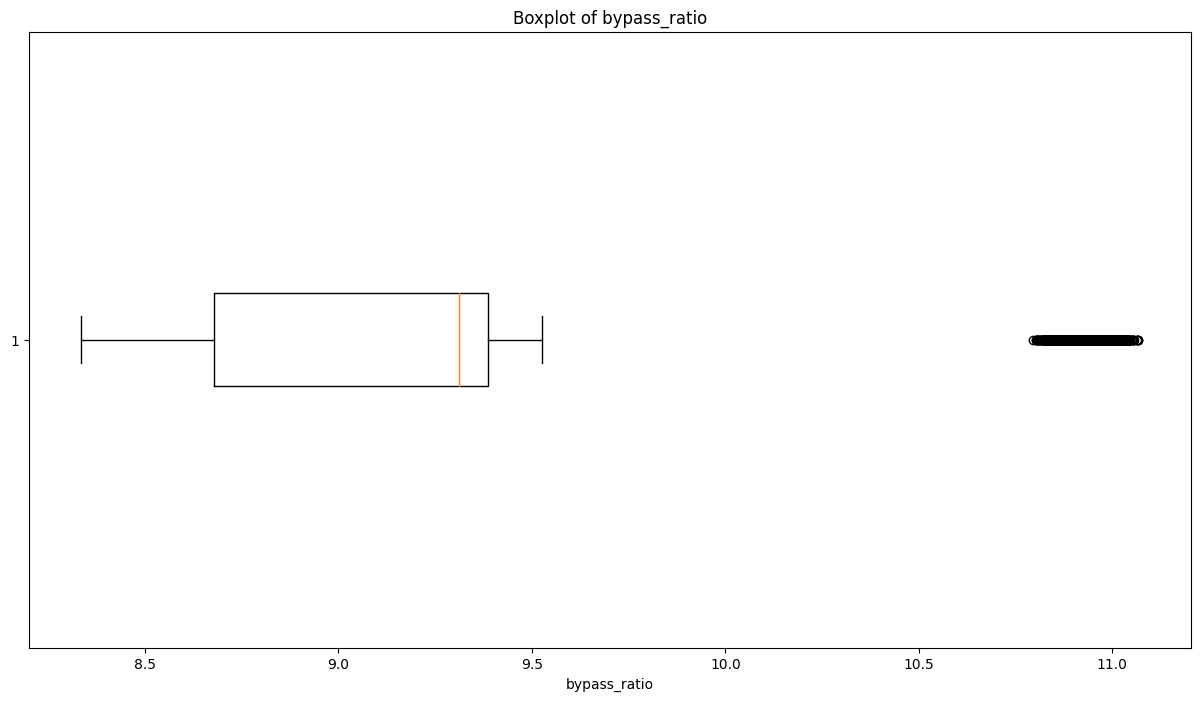

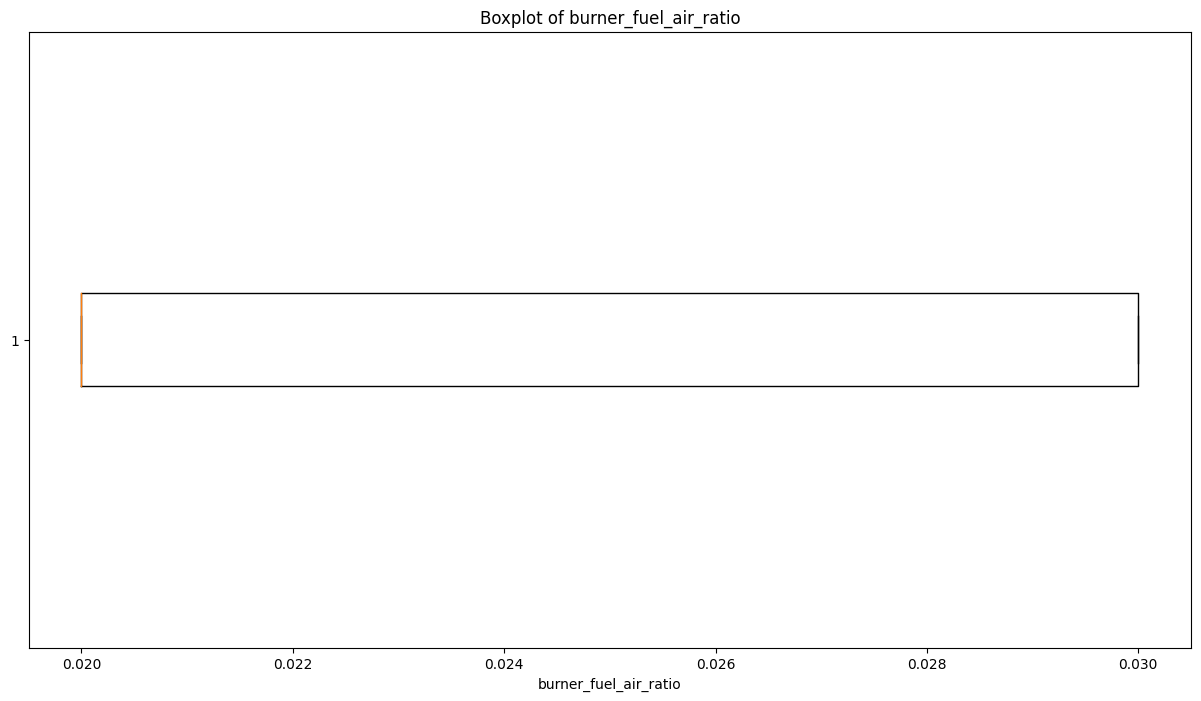

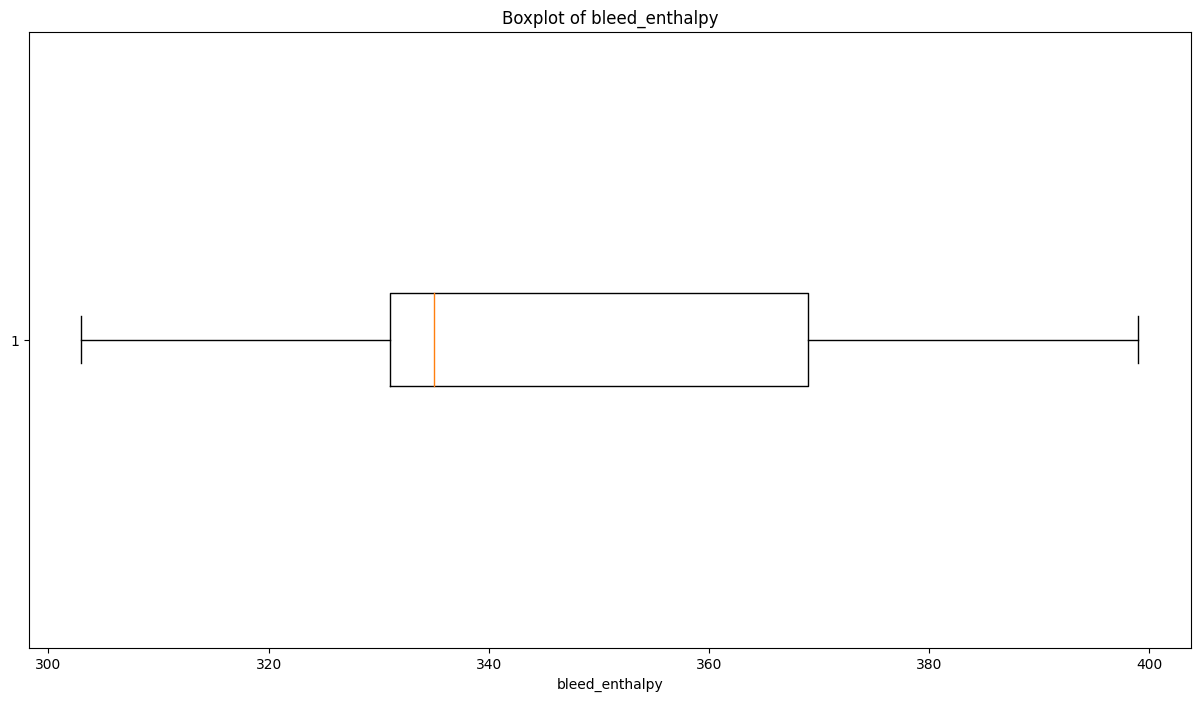

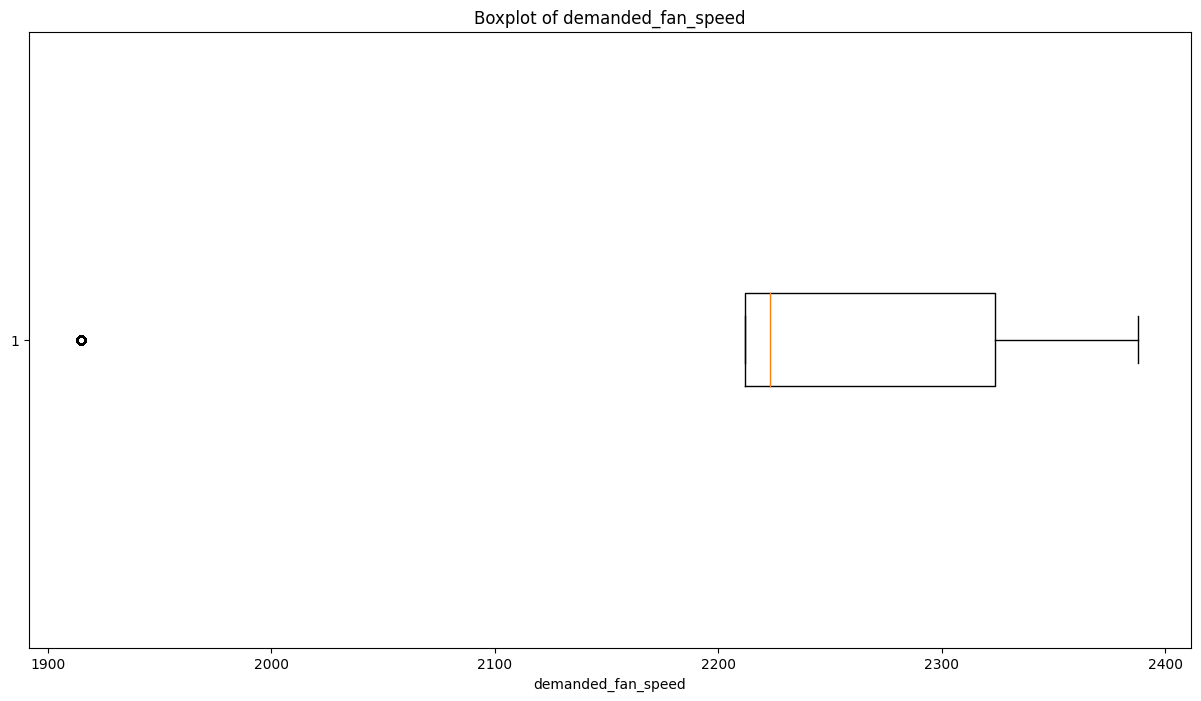

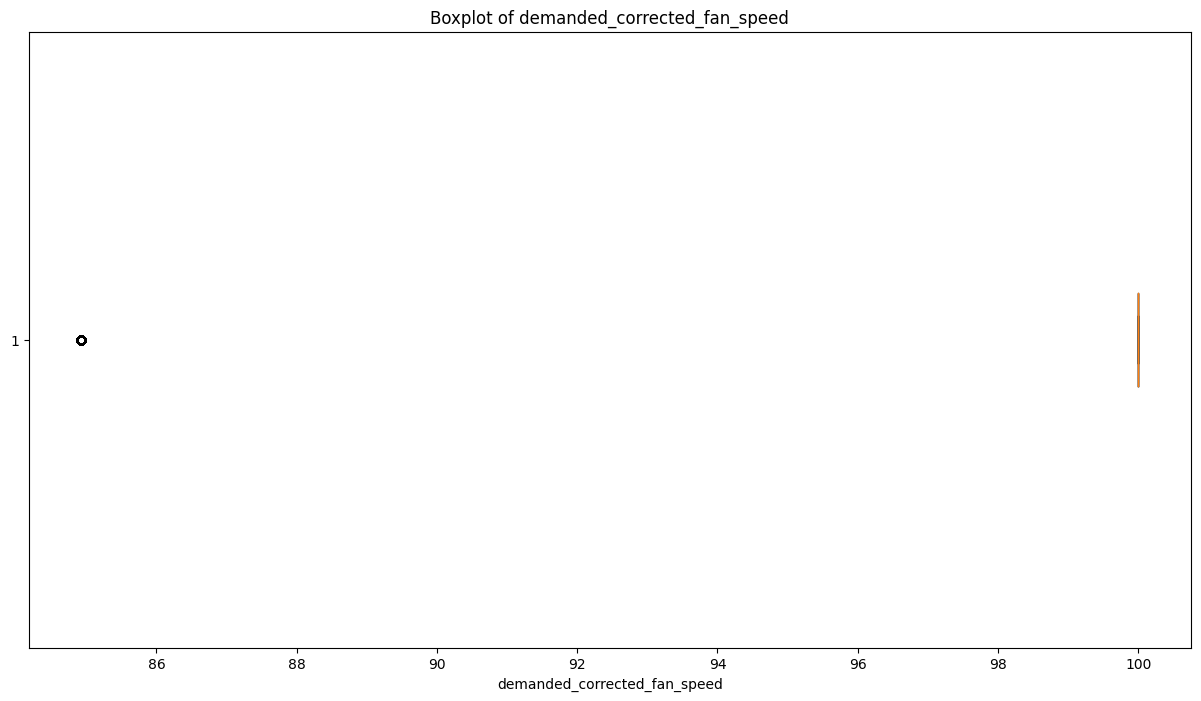

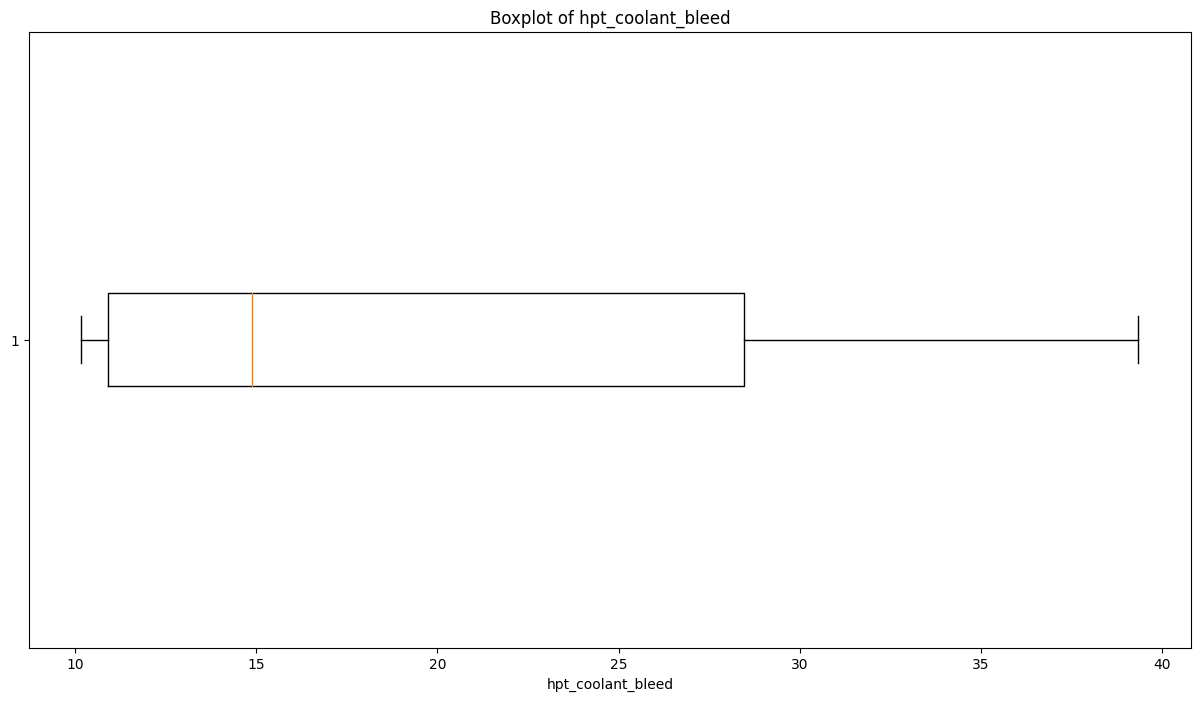

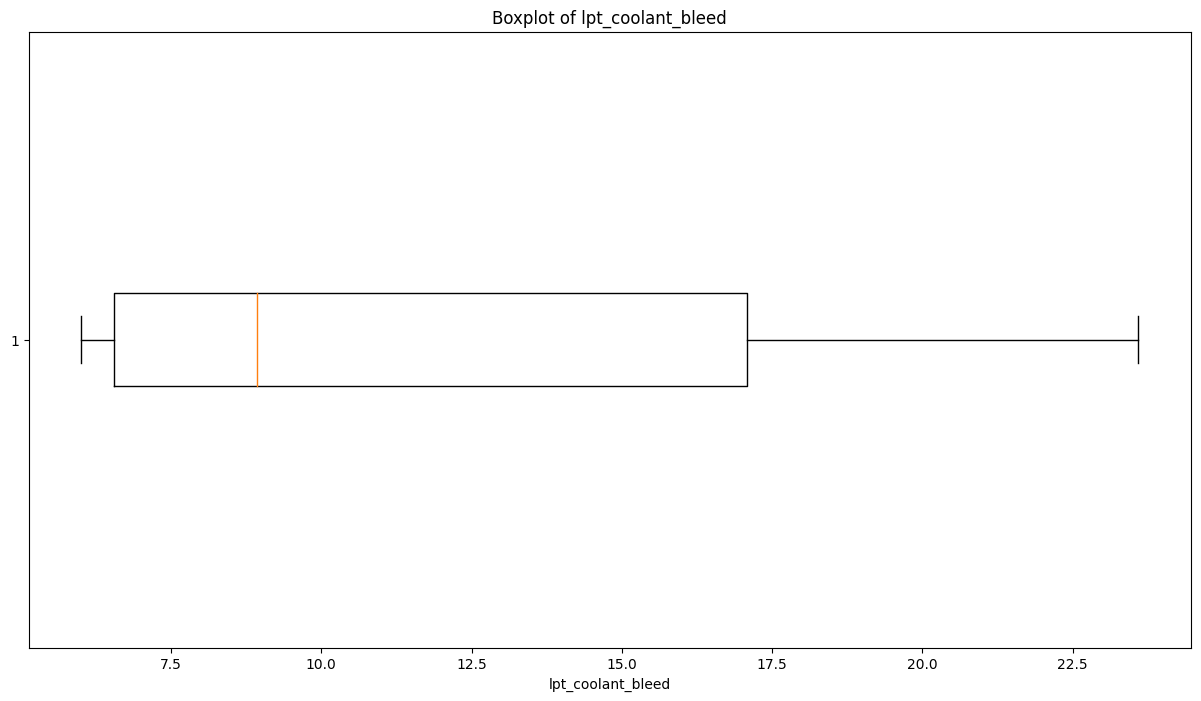

In [45]:
# List of sensor names from your dataset
sensor_names = [
    'fan_inlet_temp', 'lpc_outlet_temp', 'hpc_outlet_temp', 'lpt_outlet_temp',
    'fan_inlet_pressure', 'bypass_duct_pressure', 'hpc_outlet_pressure', 'fan_speed',
    'core_speed', 'engine_pressure_ratio', 'hpc_outlet_static_pressure', 'fuel_ps30_ratio',
    'corrected_fan_speed', 'corrected_core_speed', 'bypass_ratio', 'burner_fuel_air_ratio',
    'bleed_enthalpy', 'demanded_fan_speed', 'demanded_corrected_fan_speed',
    'hpt_coolant_bleed', 'lpt_coolant_bleed'
]

# Plot boxplots for each sensor
for sensor in sensor_names:
    plt.figure(figsize=(15, 8))
    plt.boxplot(train[sensor].dropna(), vert=False)  # Use dropna() to handle any missing values
    plt.title(f'Boxplot of {sensor}')
    plt.xlabel(sensor)
    plt.show()

# # Plot boxplots for each sensor
# for sensor in sensor_names:
#     plt.figure(figsize=(15, 8))
#     plt.boxplot(test[sensor].dropna(), vert=False)  # Use dropna() to handle any missing values
#     plt.title(f'Boxplot of {sensor}')
#     plt.xlabel(sensor)
#     plt.show()

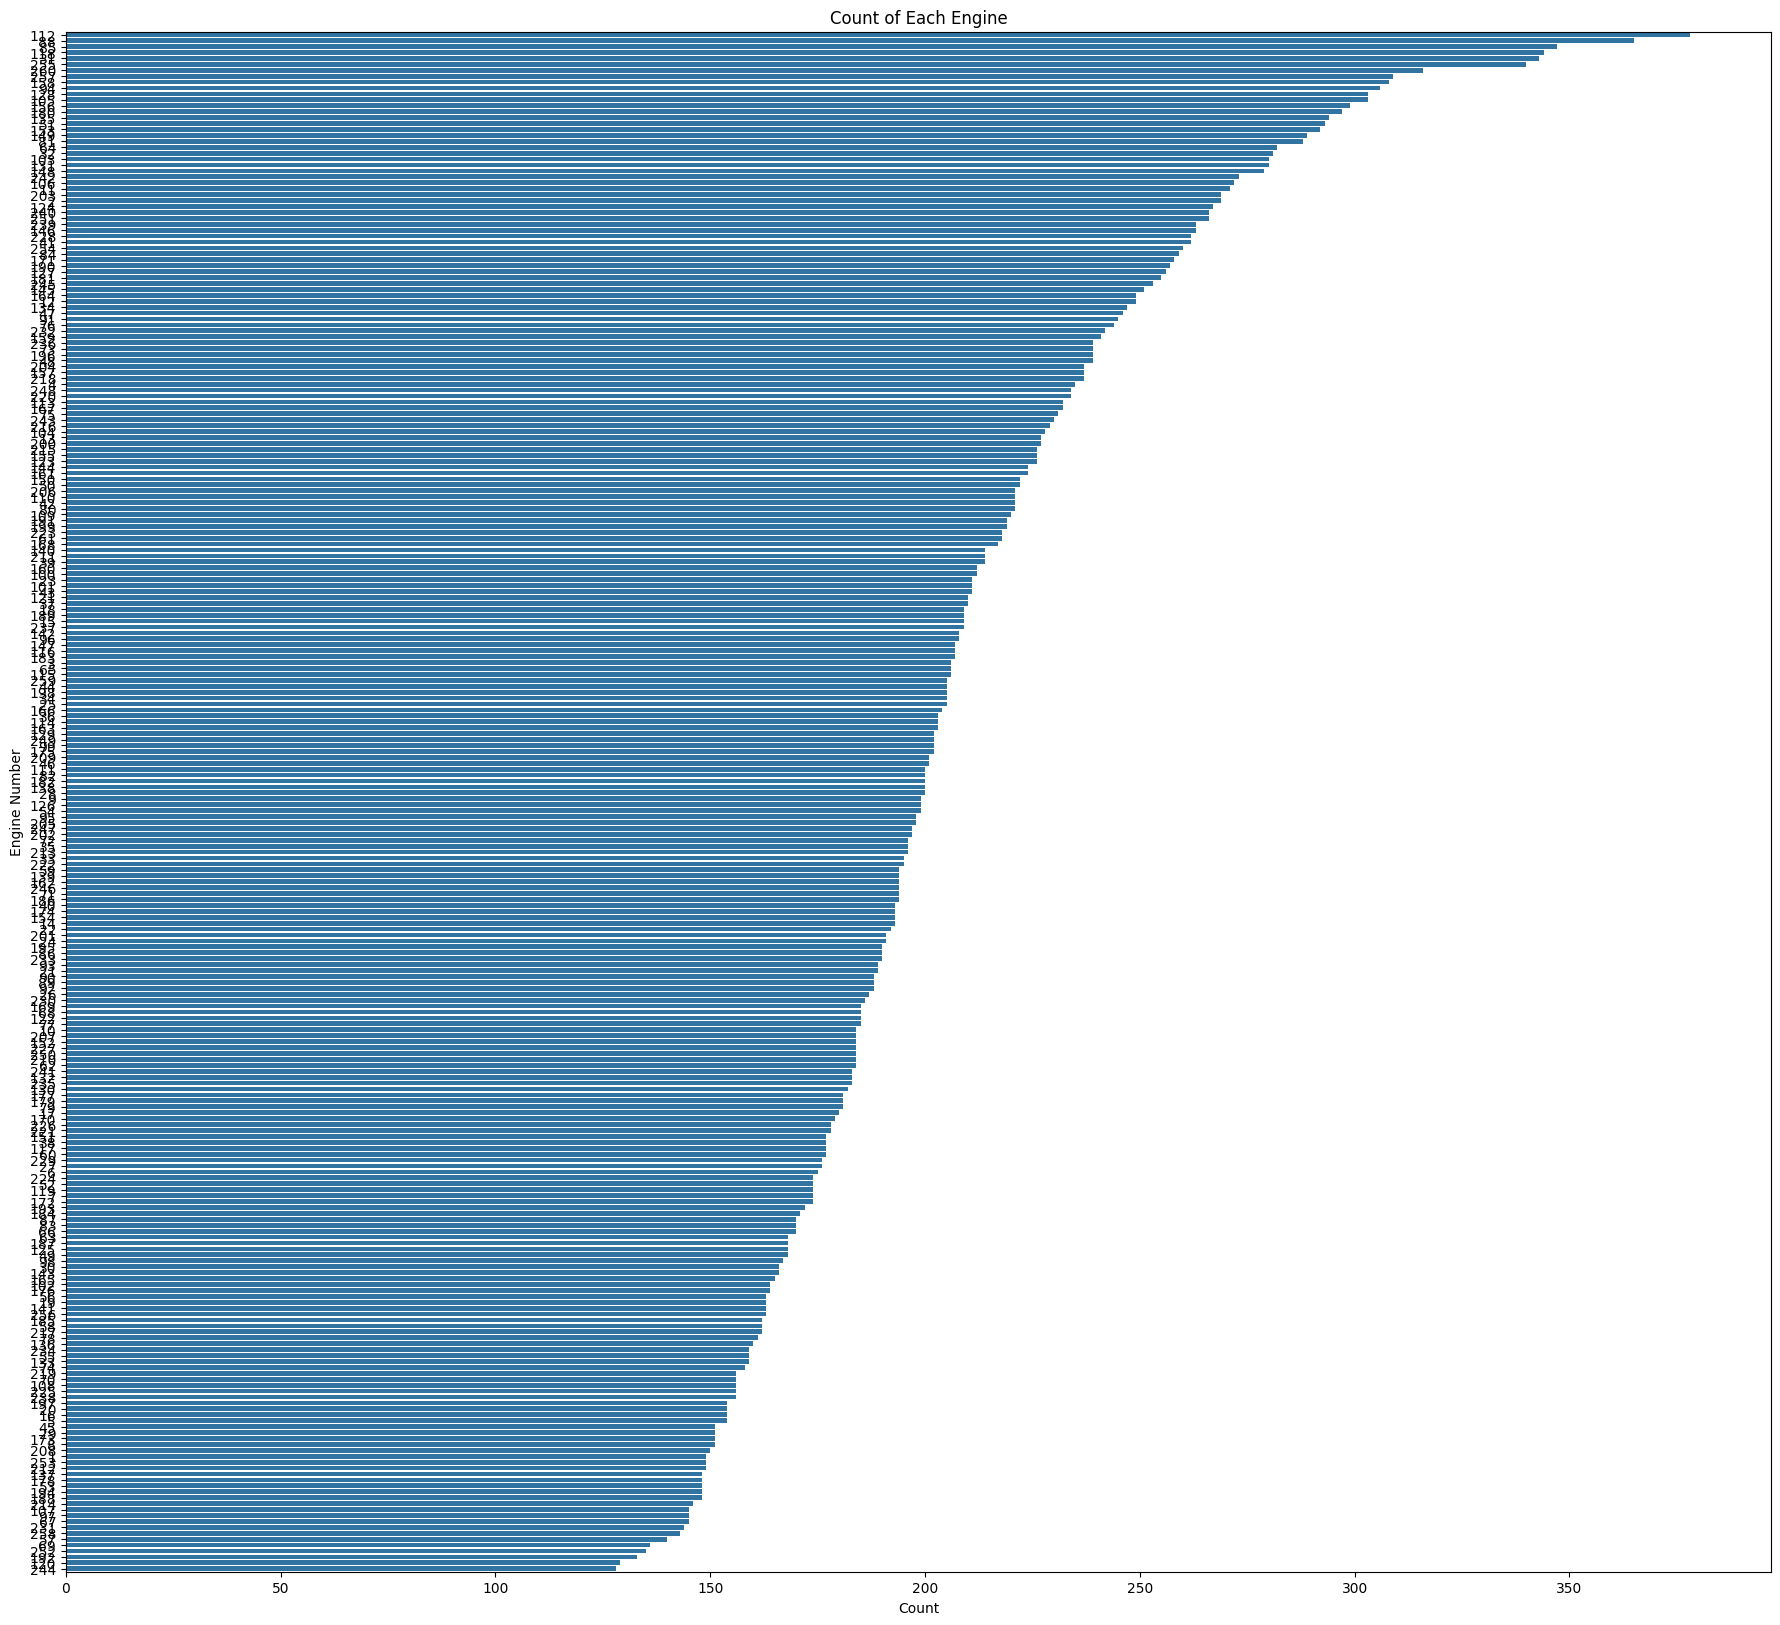

In [51]:
engine_counts = train['engine_no'].value_counts().reset_index()
engine_counts.columns = ['engine', 'count']

# # Drawing bars with seaborn
# plt.figure(figsize=(22, 12))
# sns.barplot(x='count', y='engine', data=engine_counts)
# plt.title('Count of Each Engine')
# plt.xlabel('Count')
# plt.ylabel('Engine Number')
# plt.xticks(rotation=90)
# plt.show()

# Plotting with seaborn countplot
plt.figure(figsize=(22, 20))
sns.countplot(y='engine_no', data=train, order=engine_counts['engine'])
plt.title('Count of Each Engine')
plt.xlabel('Count')
plt.ylabel('Engine Number')
plt.show()

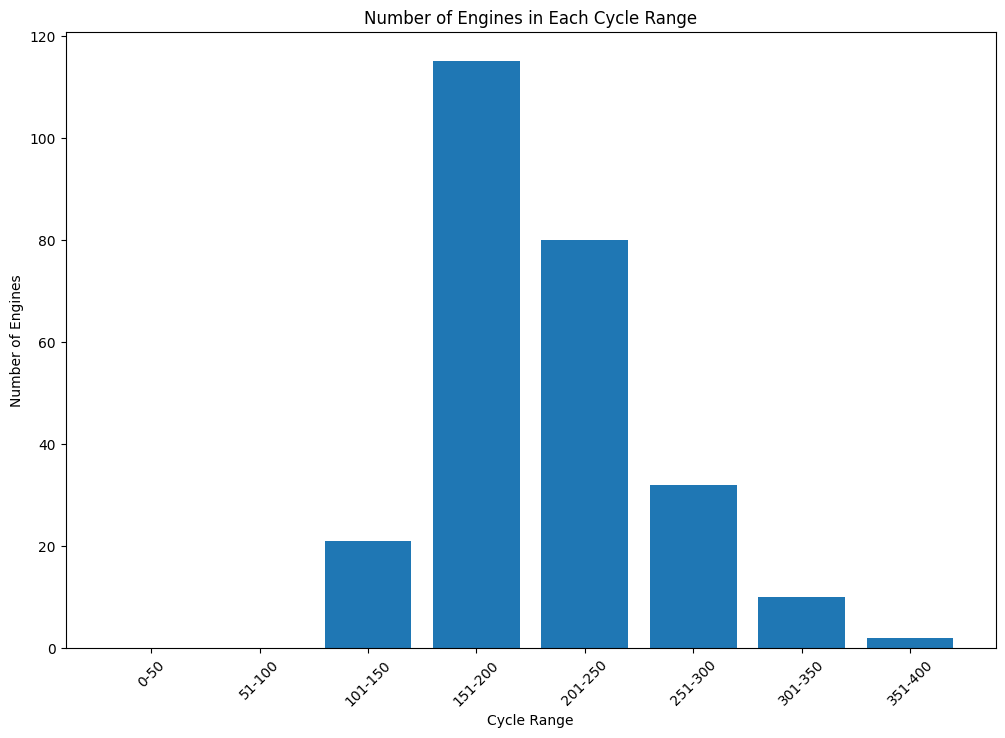

In [54]:
# Get the maximum 'cycle' value for each engine
max_cycle_per_engine = train.groupby('engine_no')['cycles_completed'].max().reset_index()

# Rename columns
max_cycle_per_engine.columns = ['engine_no', 'max_cycle']

# Sort by 'engine' column
max_cycle_per_engine = max_cycle_per_engine.sort_values('engine_no')

# # Drawing bar graphs
# plt.figure(figsize=(20, 15))
# plt.bar(max_cycle_per_engine['engine_no'].astype(str), max_cycle_per_engine['max_cycle'])
# plt.title('Maximum Cycle per Engine')
# plt.xlabel('Engine Number')
# plt.ylabel('Maximum Cycle')
# plt.xticks(rotation=90)
# plt.show()

import pandas as pd

# Define the bins and the corresponding labels
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400']

# Create a new column 'cycle_bin' to categorize 'max_cycle' into bins
max_cycle_per_engine['cycle_bin'] = pd.cut(max_cycle_per_engine['max_cycle'], bins=bins, labels=labels)

# Count the number of engines in each bin
bin_counts = max_cycle_per_engine['cycle_bin'].value_counts().sort_index()

import matplotlib.pyplot as plt

# Drawing bar graphs for binned data
plt.figure(figsize=(12, 8))
plt.bar(bin_counts.index, bin_counts.values)
plt.title('Number of Engines in Each Cycle Range')
plt.xlabel('Cycle Range')
plt.ylabel('Number of Engines')
plt.xticks(rotation=45)
plt.show()

# ML

In [35]:
train.columns

Index(['engine_no', 'cycles_completed', 'altitude', 'mach_no',
       'throttle_angle', 'fan_inlet_temp', 'lpc_outlet_temp',
       'hpc_outlet_temp', 'lpt_outlet_temp', 'fan_inlet_pressure',
       'bypass_duct_pressure', 'hpc_outlet_pressure', 'fan_speed',
       'core_speed', 'engine_pressure_ratio', 'hpc_outlet_static_pressure',
       'fuel_ps30_ratio', 'corrected_fan_speed', 'corrected_core_speed',
       'bypass_ratio', 'burner_fuel_air_ratio', 'bleed_enthalpy',
       'demanded_fan_speed', 'demanded_corrected_fan_speed',
       'hpt_coolant_bleed', 'lpt_coolant_bleed', 'RUL'],
      dtype='object')

In [36]:
index_names = ['engine_no', 'cycles_completed']

In [37]:
from sklearn.model_selection import train_test_split
drop_labels = index_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)

#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)


# Prepare validation data
drop_labels_valid = index_names + ['remaining_useful_life', 'index_y', 'source', 'index_x']
X_valid = test.drop(columns=drop_labels_valid)
X_valid_s = scaler.transform(X_valid)
y_valid = test['remaining_useful_life']


In [39]:
X_valid

,altitude,mach_no,throttle_angle,fan_inlet_temp,lpc_outlet_temp,hpc_outlet_temp,lpt_outlet_temp,fan_inlet_pressure,bypass_duct_pressure,hpc_outlet_pressure,...,fuel_ps30_ratio,corrected_fan_speed,corrected_core_speed,bypass_ratio,burner_fuel_air_ratio,bleed_enthalpy,demanded_fan_speed,demanded_corrected_fan_speed,hpt_coolant_bleed,lpt_coolant_bleed
0,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,15.49,394.54,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,5.71,138.74,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,13.66,334.36,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,8.00,193.55,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
4,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,9.03,175.75,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,20.0074,0.7000,100.0,491.19,607.61,1484.54,1248.11,9.35,13.66,335.24,...,314.99,2388.17,8074.06,9.1937,0.02,364,2324,100.00,24.62,14.7267
33987,0.0005,0.0000,100.0,518.67,642.44,1577.74,1401.16,14.62,21.60,553.69,...,521.83,2388.06,8149.36,8.3851,0.03,392,2388,100.00,38.92,23.3394
33988,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,21.61,553.13,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589
33989,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,5.72,138.27,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805


In [40]:
y_valid

0        18
1        18
2        18
3        18
4        18
         ..
33986    51
33987    51
33988    51
33989    51
33990    51
Name: remaining_useful_life, Length: 33991, dtype: int64

In [41]:
print(X_valid_s.shape)
print(y_valid.shape)

(33991, 24)
(33991,)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train_s, y_train)

# Predict on the test set
y_pred_test = lr.predict(X_test_s)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {rmse_test}")

print(f"Test Mean Squared Error: {mse_test}")
print()
print(f"Test R-squared: {r2_test}")

Test RMSE: 45.67197871009028
Test Mean Squared Error: 2085.9296392949395

Test R-squared: 0.557611033872371


In [43]:
# Predict on the validation set
y_pred_valid = lr.predict(X_valid_s)

# Evaluate the model on the validation set
mse_valid = mean_squared_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

# Calculate RMSE for the validation set
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"Validation RMSE: {rmse_valid}")

print(f"Validation Mean Squared Error: {mse_valid}")

print(f"Validation R-squared: {r2_valid}")

Validation RMSE: 82.3099540248845
Validation Mean Squared Error: 6774.9285315786
Validation R-squared: -1.8087889278965705


# REMOVING OUTLIERS

In [55]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming your dataframe is named 'train'
# Calculate Z-scores
z_scores = np.abs(stats.zscore(train.drop(columns=index_names)))

# Set a threshold for Z-scores
threshold = 3

# Identify rows to drop
outliers = np.where(z_scores > threshold)

# Create a mask to identify outliers
mask = (z_scores < threshold).all(axis=1)

# Filter out outliers
train_clean = train[mask]

print("Shape of dataset before dropping outliers:", train.shape)
print("Shape of dataset after dropping outliers:", train_clean.shape)

# Now, use 'train_clean' for further processing


Shape of dataset before dropping outliers: (53759, 27)
Shape of dataset after dropping outliers: (53538, 27)


In [56]:
# Splitting the cleaned dataset
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    train_clean.drop(columns=['RUL'] + index_names),
    train_clean['RUL'],
    test_size=0.3,
    random_state=42
)

# Scaling the features
scaler = MinMaxScaler()
X_train_s_clean = scaler.fit_transform(X_train_clean)
X_test_s_clean = scaler.transform(X_test_clean)

# Train and evaluate the model
lr_clean = LinearRegression()
lr_clean.fit(X_train_s_clean, y_train_clean)
y_pred_test_clean = lr_clean.predict(X_test_s_clean)

# Calculate RMSE and R-squared for the test set
mse_test_clean = mean_squared_error(y_test_clean, y_pred_test_clean)
r2_test_clean = r2_score(y_test_clean, y_pred_test_clean)
rmse_test_clean = np.sqrt(mse_test_clean)

print(f"Test RMSE after cleaning: {rmse_test_clean}")
print(f"Test R-squared after cleaning: {r2_test_clean}")

# For validation, repeat the same steps as before with the cleaned training data
# and use the original validation data
X_valid_s_clean = scaler.transform(X_valid)
y_pred_valid_clean = lr_clean.predict(X_valid_s_clean)

mse_valid_clean = mean_squared_error(y_valid, y_pred_valid_clean)
r2_valid_clean = r2_score(y_valid, y_pred_valid_clean)
rmse_valid_clean = np.sqrt(mse_valid_clean)

print(f"Validation RMSE after cleaning: {rmse_valid_clean}")
print(f"Validation R-squared after cleaning: {r2_valid_clean}")


Test RMSE after cleaning: 44.42362940128544
Test R-squared after cleaning: 0.5751410811647164
Validation RMSE after cleaning: 81.07099193228666
Validation R-squared after cleaning: -1.7248673170523228
